# Comparison of means

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# make up some data
measurement_A = [1, 9, 7, 1, 2, 8, 9, 2, 1, 7, 8]
measurement_B = [4, 5, 5, 7, 4, 5, 4, 6, 6, 5, 4]

# show measurements as table
pd.DataFrame([measurement_A, measurement_B], ["A", "B"]).transpose()

,A,B
0,1,4
1,9,5
2,7,5
3,1,7
4,2,4
5,8,5
6,9,4
7,2,6
8,1,6
9,7,5


In [15]:
print("Mean(A) = " + str(np.mean(measurement_A)))
print("Mean(B) = " + str(np.mean(measurement_B)))

Mean(A) = 5.0
Mean(B) = 5.0


Take your personal notes here.

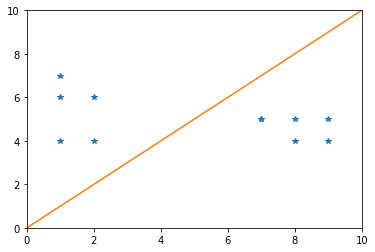

In [24]:
plt.plot(measurement_A, measurement_B, "*")
plt.plot([0, 10], [0, 10])
plt.axis([0, 10, 0, 10])
plt.show()

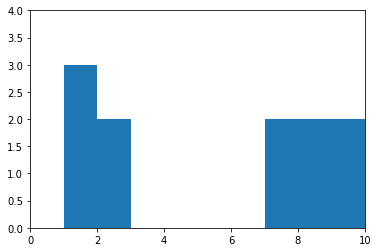

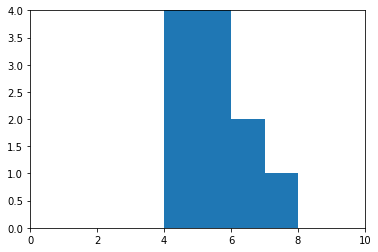

In [21]:

def draw_histogram(data):
    counts, bins = np.histogram(data, bins=10, range=(0,10))
    plt.hist(bins[:-1], bins, weights=counts)
    plt.axis([0, 10, 0, 4])
    plt.show()
    
draw_histogram(measurement_A)
draw_histogram(measurement_B)

# Correlation
The data for the following expriment is taken from 1 Altman & Bland, The Statistician 32, 1983, Fig. 1.

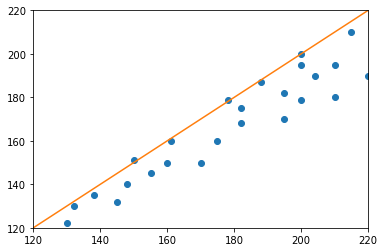

In [26]:
measurement_1 = [130, 132, 138, 145, 148, 150, 155, 160, 161, 170, 175, 178, 182, 182, 188, 195, 195, 200, 200, 204, 210, 210, 215, 220, 200]
measurement_2 = [122, 130, 135, 132, 140, 151, 145, 150, 160, 150, 160, 179, 168, 175, 187, 170, 182, 179, 195, 190, 180, 195, 210, 190, 200]

plt.plot(measurement_1, measurement_2, "o")
plt.plot([120, 220], [120, 220])
plt.axis([120, 220, 120, 220])
plt.show()

In [31]:
# Determining Pearson's correlation coefficient r with a for-loop
import numpy as np

# get the mean of the measurements
mean_1 = np.mean(measurement_1)
mean_2 = np.mean(measurement_2)

# get the number of measurements
n = len(measurement_1)

# get the standard deviation of the measurements
std_dev_1 = np.std(measurement_1)
std_dev_2 = np.std(measurement_2)

# sum the expectation of 
sum = 0
for m_1, m_2 in zip(measurement_1, measurement_2):
    sum = sum + (m_1 - mean_1) * (m_2 - mean_2) / n

r = sum / (std_dev_1 * std_dev_2)

print ("r = " + str(r))

r = 0.9435300113035253


In [32]:
# Determine Pearson's r using scipy
from scipy import stats

stats.pearsonr(measurement_1, measurement_2)

(0.9435300113035255, 1.6002440484659832e-12)

# Bland-Altman plots and the coefficient of repeatability

In [33]:
# A function for drawing Bland-Altman plots
# source https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

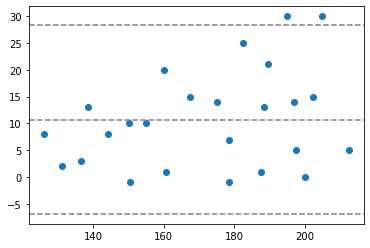

In [34]:
# draw a Bland-Altman plot
bland_altman_plot(measurement_1, measurement_2)
plt.show()

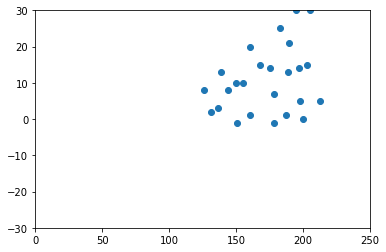

In [37]:
# draw a modified Bland-Altman plot with an extended axis

def bland_altman_plot_mod(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    
bland_altman_plot_mod(measurement_1, measurement_2)
plt.axis([0, 250, -30, 30])
plt.show()